In [1]:
## Python basics - Timeseries data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
amazon = pd.read_csv('/Users/kamal/Desktop/work/20_JupyterNotebooks/Data/amazon.csv')

In [3]:
amazon.head()

,Date,Open,High,Low,Close,Adj Close
0,5/15/97,2.437500,2.500000,1.927083,1.958333,1.958333
1,5/16/97,1.968750,1.979167,1.708333,1.729167,1.729167
2,5/19/97,1.760417,1.770833,1.625000,1.708333,1.708333
3,5/20/97,1.729167,1.750000,1.635417,1.635417,1.635417
4,5/21/97,1.635417,1.645833,1.375000,1.427083,1.427083


In [4]:
amazon.tail()

,Date,Open,High,Low,Close,Adj Close
5524,4/30/19,1930.099976,1935.709961,1906.949951,1926.520020,1926.520020
5525,5/1/19,1933.089966,1943.640015,1910.550049,1911.520020,1911.520020
5526,5/2/19,1913.329956,1921.550049,1881.869995,1900.819946,1900.819946
5527,5/3/19,1949.000000,1964.400024,1936.000000,1962.459961,1962.459961
5528,5/6/19,1917.979980,1959.000000,1910.500000,1950.550049,1950.550049


In [5]:
amazon.shape

(5529, 6)

In [6]:
amazon.index

RangeIndex(start=0, stop=5529, step=1)

In [7]:
amazon['Date'].head()

0    5/15/97
1    5/16/97
2    5/19/97
3    5/20/97
4    5/21/97
Name: Date, dtype: object

In [8]:
# Modify index to Date value and use that as index 
amazon.index = pd.to_datetime(amazon['Date'])

amazon.index

DatetimeIndex(['1997-05-15', '1997-05-16', '1997-05-19', '1997-05-20',
               '1997-05-21', '1997-05-22', '1997-05-23', '1997-05-27',
               '1997-05-28', '1997-05-29',
               ...
               '2019-04-23', '2019-04-24', '2019-04-25', '2019-04-26',
               '2019-04-29', '2019-04-30', '2019-05-01', '2019-05-02',
               '2019-05-03', '2019-05-06'],
              dtype='datetime64[ns]', name='Date', length=5529, freq=None)

In [9]:
amazon.head()

,Date,Open,High,Low,Close,Adj Close
Date,,,,,,
1997-05-15,5/15/97,2.437500,2.500000,1.927083,1.958333,1.958333
1997-05-16,5/16/97,1.968750,1.979167,1.708333,1.729167,1.729167
1997-05-19,5/19/97,1.760417,1.770833,1.625000,1.708333,1.708333
1997-05-20,5/20/97,1.729167,1.750000,1.635417,1.635417,1.635417
1997-05-21,5/21/97,1.635417,1.645833,1.375000,1.427083,1.427083


In [10]:
# We don't need separate Date column now and hence can be deleted
del amazon["Date"]

amazon.head()

,Open,High,Low,Close,Adj Close
Date,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333
1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167
1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333
1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083


In [11]:
amazon.tail()

,Open,High,Low,Close,Adj Close
Date,,,,,
2019-04-30,1930.099976,1935.709961,1906.949951,1926.520020,1926.520020
2019-05-01,1933.089966,1943.640015,1910.550049,1911.520020,1911.520020
2019-05-02,1913.329956,1921.550049,1881.869995,1900.819946,1900.819946
2019-05-03,1949.000000,1964.400024,1936.000000,1962.459961,1962.459961
2019-05-06,1917.979980,1959.000000,1910.500000,1950.550049,1950.550049


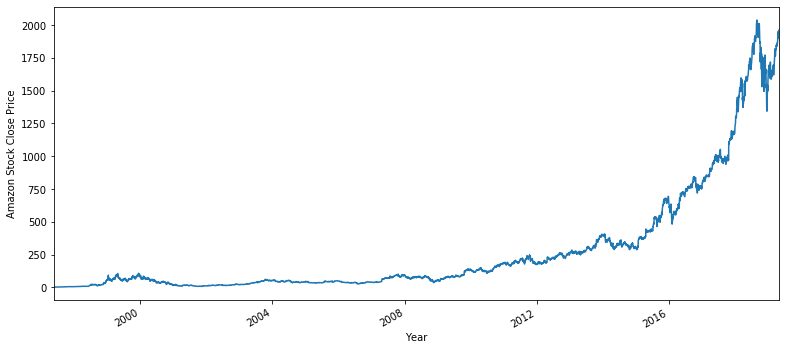

In [13]:
amazon['Adj Close'].plot(kind = 'line',
                        figsize=(13,6))
plt.ylabel('Amazon Stock Close Price')
plt.xlabel('Year')

plt.show()

In [14]:
amazon['Adj Close']['2008-12-12']

51.25

In [15]:
amazon['Adj Close']['2018-11-29']

1673.569946

In [18]:
# Month wise aggregation and getting mean/avergae by month
# Last tradinng day per each month is shown
monthly_mean = amazon['Adj Close'].resample('M').mean()

monthly_mean.head(10)

Date
1997-05-31    1.588542
1997-06-30    1.537699
1997-07-31    2.205493
1997-08-31    2.231399
1997-09-30    3.492560
1997-10-31    4.267437
1997-11-30    4.378564
1997-12-31    4.563210
1998-01-31    4.803906
1998-02-28    5.297423
Freq: M, Name: Adj Close, dtype: float64

In [19]:
# Similarly monthly median
monthly_median = amazon['Adj Close'].resample('M').median()

monthly_median.head(10)

Date
1997-05-31    1.531250
1997-06-30    1.510417
1997-07-31    2.276042
1997-08-31    2.208333
1997-09-30    3.354167
1997-10-31    4.020833
1997-11-30    4.375000
1997-12-31    4.562500
1998-01-31    4.825521
1998-02-28    5.229167
Freq: M, Name: Adj Close, dtype: float64

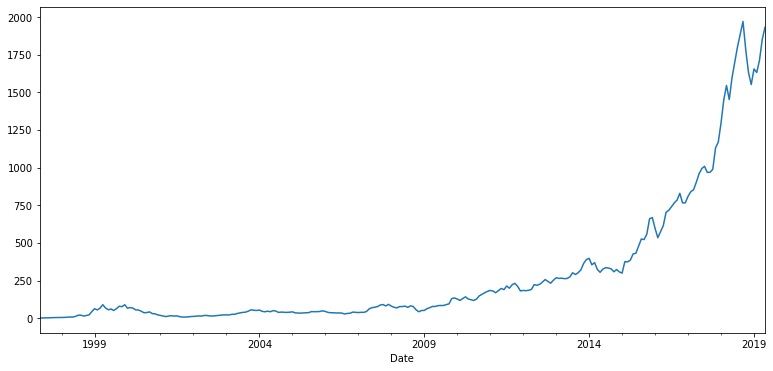

In [20]:
monthly_median.plot(figsize=(13,6))
plt.show()

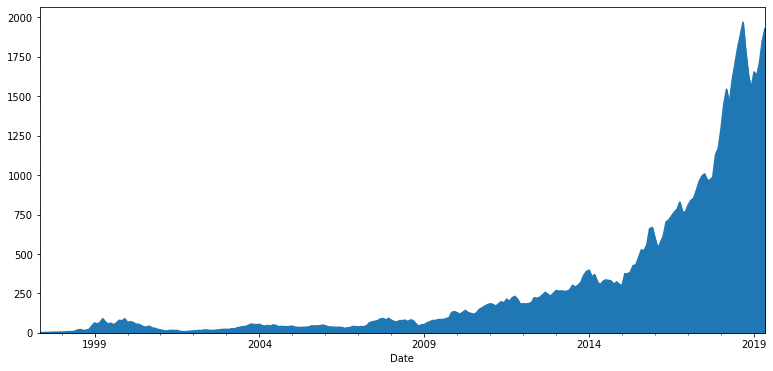

In [21]:
#Some customizationss
monthly_median.plot(kind = 'area',figsize=(13,6))
plt.show()

In [24]:
# Difference between stock prices
amazon_delta = amazon['Adj Close'].diff()

amazon_delta.head(10)

Date
1997-05-15         NaN
1997-05-16   -0.229166
1997-05-19   -0.020834
1997-05-20   -0.072916
1997-05-21   -0.208334
1997-05-22   -0.031250
1997-05-23    0.104167
1997-05-27    0.083333
1997-05-28   -0.052083
1997-05-29   -0.026042
Name: Adj Close, dtype: float64

In [25]:
# % change on every day basis
amazon_returns = amazon['Adj Close'].pct_change()

amazon_returns.head(10)

Date
1997-05-15         NaN
1997-05-16   -0.117021
1997-05-19   -0.012049
1997-05-20   -0.042683
1997-05-21   -0.127389
1997-05-22   -0.021898
1997-05-23    0.074627
1997-05-27    0.055555
1997-05-28   -0.032895
1997-05-29   -0.017007
Name: Adj Close, dtype: float64

In [26]:
#Moving averages
rolling_mean = amazon_returns.rolling(window = 5).mean()

rolling_mean.head(10)

Date
1997-05-15         NaN
1997-05-16         NaN
1997-05-19         NaN
1997-05-20         NaN
1997-05-21         NaN
1997-05-22   -0.064208
1997-05-23   -0.025878
1997-05-27   -0.012357
1997-05-28   -0.010400
1997-05-29    0.011677
Name: Adj Close, dtype: float64

In [27]:
rolling_std = amazon_returns.rolling(window = 5).std()

rolling_std.head(10)

Date
1997-05-15         NaN
1997-05-16         NaN
1997-05-19         NaN
1997-05-20         NaN
1997-05-21         NaN
1997-05-22    0.054211
1997-05-23    0.072276
1997-05-27    0.081273
1997-05-28    0.080474
1997-05-29    0.049560
Name: Adj Close, dtype: float64